In [1]:
import numpy as np
import copy
from sklearn import preprocessing
import tensorflow as tf
from tensorflow import keras
import os
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')
import imblearn
from collections import Counter
from numpy.random import seed
np.random.seed(2095)


In [2]:
def findRemnant(a,b,c):
    data_array = np.ones((1,a.shape[1]))
    label_array = np.array([1])
    b = list(b)
    b = [list(i) for i in b]
    for loc in np.arange(len(a)):
        entry = list(a[loc])
        if entry not in b:
            data_array = np.r_[data_array,np.array([entry])]
            label_array = np.r_[label_array,c[loc]]
    
    np.delete(data_array,0,0)
    np.delete(label_array,0,0)
    
    return data_array, label_array
        

In [3]:
# read input file
file = 'your_file.xlsx'
ipData = pd.read_excel(file, sheet_name='CoroHeartDis')
#print(ipData.columns) 

In [4]:
# data drop
opLabel = np.array(ipData['CoronaryHeartDisease'])
ipData.drop(['SEQN','CoronaryHeartDisease','Annual-Family-Income','Height','Ratio-Family-Income-Poverty','X60-sec-pulse',
          'Health-Insurance','Lymphocyte','Monocyte','Eosinophils','Total-Cholesterol','Mean-Cell-Vol','Mean-Cell-Hgb-Conc.','Hematocrit','Segmented-Neutrophils'], axis = 1, inplace=True)


In [5]:
# dummy variable for categorical variables
ipData = pd.get_dummies(ipData,columns=["Gender","Diabetes","Blood-Rel-Diabetes","Blood-Rel-Stroke","Vigorous-work","Moderate-work"]) 

varb = np.array(ipData.columns)
ipData = np.array(ipData)

In [6]:
print(ipData.shape)
print(varb)
print(len(opLabel[opLabel==0]))
print(len(opLabel[opLabel==1]))
print(np.where(opLabel==1))

(37079, 45)
['Age' 'Systolic' 'Diastolic' 'Weight' 'Body-Mass-Index'
 'White-Blood-Cells' 'Basophils' 'Red-Blood-Cells' 'Hemoglobin'
 'Mean-cell-Hemoglobin' 'Platelet-count' 'Mean-Platelet-Vol'
 'Red-Cell-Distribution-Width' 'Albumin' 'ALP' 'AST' 'ALT' 'Cholesterol'
 'Creatinine' 'Glucose' 'GGT' 'Iron' 'LDH' 'Phosphorus' 'Bilirubin'
 'Protein' 'Uric.Acid' 'Triglycerides' 'HDL' 'Glycohemoglobin' 'Gender_1'
 'Gender_2' 'Diabetes_1' 'Diabetes_2' 'Diabetes_3' 'Blood-Rel-Diabetes_1'
 'Blood-Rel-Diabetes_2' 'Blood-Rel-Stroke_1' 'Blood-Rel-Stroke_2'
 'Vigorous-work_1' 'Vigorous-work_2' 'Vigorous-work_3' 'Moderate-work_1'
 'Moderate-work_2' 'Moderate-work_3']
35571
1508
(array([   14,    39,    72, ..., 36935, 36966, 37057], dtype=int64),)


In [7]:
# Data partition 
label0_indx = np.where(opLabel==0)[0]   #no cardiac arrest
label1_indx = np.where(opLabel==1)[0]   #cardiac arrest 
train_ratio = 0.9
numTrainData0 = np.int(len(label0_indx)*train_ratio)
numTrainData1 = np.int(len(label1_indx)*train_ratio)
np.random.shuffle(label0_indx)
np.random.shuffle(label1_indx)

label0_indx_train = label0_indx[0:numTrainData0]
label1_indx_train = label1_indx[0:numTrainData1]
label0_indx_test  = label0_indx[numTrainData0:]
label1_indx_test  = label1_indx[numTrainData1:]

testIndx  = np.append(label0_indx_test,label1_indx_test)
trainIndx = np.append(label0_indx_train,label1_indx_train)    
x_train  =  ipData[trainIndx]
y_train  =  opLabel[trainIndx]
x_test   =  ipData[testIndx]
y_test   =  opLabel[testIndx]    

##%% data standardization
scaler = preprocessing.StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test  = scaler.transform(x_test)

#x_train_org     = copy.deepcopy(x_train)
#x_test_org      = copy.deepcopy(x_test)
#y_train_org     = copy.deepcopy(y_train)
#y_test_org      = copy.deepcopy(y_test)



In [8]:
print(x_train.shape)

(33370, 45)


### t-SNE visualization

In [17]:
from sklearn.manifold import TSNE
import seaborn as sns

In [18]:
X_embedded = TSNE(n_components=3, n_iter = 300, verbose=1).fit_transform(x_train)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 33370 samples in 1.056s...
[t-SNE] Computed neighbors for 33370 samples in 305.214s...
[t-SNE] Computed conditional probabilities for sample 1000 / 33370
[t-SNE] Computed conditional probabilities for sample 2000 / 33370
[t-SNE] Computed conditional probabilities for sample 3000 / 33370
[t-SNE] Computed conditional probabilities for sample 4000 / 33370
[t-SNE] Computed conditional probabilities for sample 5000 / 33370
[t-SNE] Computed conditional probabilities for sample 6000 / 33370
[t-SNE] Computed conditional probabilities for sample 7000 / 33370
[t-SNE] Computed conditional probabilities for sample 8000 / 33370
[t-SNE] Computed conditional probabilities for sample 9000 / 33370
[t-SNE] Computed conditional probabilities for sample 10000 / 33370
[t-SNE] Computed conditional probabilities for sample 11000 / 33370
[t-SNE] Computed conditional probabilities for sample 12000 / 33370
[t-SNE] Computed conditional probabilities for s

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

cin = sns.color_palette("Set1")[1]
edge_color = []
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_facecolor('w')
ax.scatter(X_embedded[:,0],X_embedded[:,1],X_embedded[:,2],c=[sns.color_palette("Set1")[x] for x in y_train],\
           edgecolors='k',label='no-CHD')
ax.scatter(0,0,0,c=cin,edgecolors='k',label='CHD')
ax.azim = 20
ax.elev = 20
ax.set_xlabel("t-SNE Dim 1", size="x-large")
ax.set_ylabel("t-SNE Dim 2", size="x-large")
ax.set_zlabel("t-SNE Dim 3", size="x-large")
plt.title("90% training data (original)",size="xx-large")
ax.legend(loc='upper left')
fig.set_size_inches(7.5,7.5)
fig.savefig('Original-tSNE.png', dpi=100)

In [38]:
ee=sns.color_palette("Set1")[0]
ee

(0.8941176470588236, 0.10196078431372549, 0.10980392156862745)

# Oversampling strategies: ROS, SMOTE, SVM-SMOTE, ADASYN

## ROS

In [10]:
# Random oversampling
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(x_train, y_train)

In [11]:
print('Resampled dataset shape %s' % Counter(y_resampled))

Resampled dataset shape Counter({0: 32013, 1: 32013})


### t-SNE visualization

In [ ]:
#X_embedded = TSNE(n_components=3, n_iter = 300, verbose=1).fit_transform(X_resampled)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 64026 samples in 1.359s...


In [ ]:
from mpl_toolkits.mplot3d import Axes3D

cin = sns.color_palette("Set1")[1]
edge_color = []
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_facecolor('w')
ax.scatter(X_embedded[:,0],X_embedded[:,1],X_embedded[:,2],c=[sns.color_palette("Set1")[x] for x in y_resampled],\
           edgecolors='k',label='no-CAD')
ax.scatter(0,0,0,c=cin,edgecolors='k',label='CAD')
ax.azim = 20
ax.elev = 20
ax.set_xlabel("t-SNE Dim 1", size="x-large")
ax.set_ylabel("t-SNE Dim 2", size="x-large")
ax.set_zlabel("t-SNE Dim 3", size="x-large")
plt.title("Random Oversampling",size="xx-large")
ax.legend(loc='upper left')
fig.set_size_inches(7.5,7.5)
#fig.savefig('Original.png', dpi=100)

In [42]:
# Change shape for CNN
x_train_CNN = X_resampled.reshape(X_resampled.shape[0],X_resampled.shape[1],1)
x_test_CNN = x_test.reshape(x_test.shape[0],x_test.shape[1],1)
#%% one-hot-encoding
y_train_CNN = keras.utils.to_categorical(y_resampled,2)
y_test_CNN  = keras.utils.to_categorical(y_test,2)

In [49]:
print(x_train_CNN.shape[1])

45


In [50]:
inputs = keras.layers.Input(shape=(x_train_CNN.shape[1],1))
RS0    = keras.layers.Reshape((x_train_CNN.shape[1], ))(inputs)
FC0    = keras.layers.Dense(64, bias_initializer=keras.initializers.VarianceScaling())(RS0)
BN0    = keras.layers.BatchNormalization(axis=-1)(FC0)
AC0    = keras.layers.Activation('relu')(BN0)
DP0    = keras.layers.Dropout(0.2)(AC0)

RS1    = keras.layers.Reshape((64,1))(DP0)
FC1    = keras.layers.Conv1D(2,3,strides=1)(RS1)
BN1    = keras.layers.BatchNormalization(axis=-1)(FC1)
AC1    = keras.layers.Activation('relu')(BN1)
Pool1  = keras.layers.AveragePooling1D(pool_size=2)(AC1)

FC2    = keras.layers.Conv1D(4,5,strides=1)(Pool1)
BN2    = keras.layers.BatchNormalization(axis=-1)(FC2)
AC2    = keras.layers.Activation('relu')(BN2)
Pool2  = keras.layers.AveragePooling1D(pool_size=2)(AC2)

FL1    = keras.layers.Flatten()(Pool2)

FC3    = keras.layers.Dense(512, bias_initializer=keras.initializers.VarianceScaling())(FL1)
BN3    = keras.layers.BatchNormalization(axis=-1)(FC3)
AC3    = keras.layers.Activation('relu')(BN3)
DP3    = keras.layers.Dropout(0.2)(AC3)


FC4    = keras.layers.Dense(2)(DP3)
outputs = keras.layers.Activation('softmax')(FC4)

myCNN1D4 = keras.Model(inputs=inputs,outputs=outputs)
myCNN1D4.compile(optimizer=keras.optimizers.Adam(),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
myCNN1D4.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 45, 1)]           0         
_________________________________________________________________
reshape_2 (Reshape)          (None, 45)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                2944      
_________________________________________________________________
batch_normalization_4 (Batch (None, 64)                256       
_________________________________________________________________
activation_5 (Activation)    (None, 64)                0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
reshape_3 (Reshape)          (None, 64, 1)             0   

In [70]:
class_weight = {0: 1, 1: 1}

myCNN1D4.fit(x_train_CNN,y_train_CNN,batch_size=8,epochs=3,verbose=1,class_weight=class_weight)

Train on 64026 samples
Epoch 1/3
64026/64026 [==============================] - 152s 2ms/sample - loss: 0.4297 - accuracy: 0.80401:42 - loss: 0.4340 - accuracy - ETA: 1:42 - loss: 0.4339 - accuracy: 0.79 - ETA: 1:42 - loss: 0.4340 - ac - ETA - ETA: 1:43 - loss: 0.4325  - ETA: 1:39 - l - ETA: 1:39 - loss: 0.4306  - ETA: 1:38 - loss: 0.4308 - accura - ETA: 1:38 - loss: 0.4312  - ETA: 1:37 - loss: 0.4324 - accu - ETA: 1:37 - loss: 0.4322 - accuracy:  - - ETA: 1:35 - l - ETA: 1:34 - loss: 0.4328 -  - ETA: 1: - ETA: 1:08 - loss: 0 - ETA: 1:08 - loss: - ETA: 1:07 - loss: 0.4320 - accura - E - ETA: 1:06 - loss: 0.4308 - accuracy: 0.80 - ETA: 1:05 - loss: 0.4307 - accuracy:  - ETA: 1:05 - loss: 0.4308 - accuracy:  - ETA: 1:05 - loss: 0.4308 - accuracy: 0.80 - ETA: 1:05 - loss: 0.4309 - accuracy: 0. - ETA: 1:05 - loss: 0.4309 -  - ETA: 1:03 - loss: 0.4311 -  - ETA: 1:03 - loss: 0.4309 -  - ETA: 1:02 - loss: 0.4311  - ETA: 1:02 - loss: 0.431 - ETA: 1:01 - loss: 0.4310 - accuracy: 0.80 - ETA: 1:0

In [71]:
test_loss,test_acc = myCNN1D4.evaluate(x_test_CNN,y_test_CNN)
print(test_acc)

3709/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.094095446


In [72]:
from sklearn import metrics
predlabel = myCNN1D4.predict(x_test_CNN)
f = np.argmax(predlabel,axis=1)
confMat = metrics.confusion_matrix(np.argmax(y_test_CNN,axis=1),f)
print(confMat)

[[ 199 3359]
 [   1  150]]


## SMOTE (2002)

In [9]:
from imblearn.over_sampling import SMOTE

X_resampled, y_resampled = SMOTE().fit_resample(x_train, y_train)

In [10]:
print('Resampled dataset shape %s' % Counter(y_resampled))

Resampled dataset shape Counter({0: 32013, 1: 32013})


### t-SNE visualization

In [11]:
from sklearn.manifold import TSNE
import seaborn as sns
X_embedded = TSNE(n_components=3, n_iter = 300, verbose=1).fit_transform(X_resampled)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 64026 samples in 2.501s...
[t-SNE] Computed neighbors for 64026 samples in 1128.692s...
[t-SNE] Computed conditional probabilities for sample 1000 / 64026
[t-SNE] Computed conditional probabilities for sample 2000 / 64026
[t-SNE] Computed conditional probabilities for sample 3000 / 64026
[t-SNE] Computed conditional probabilities for sample 4000 / 64026
[t-SNE] Computed conditional probabilities for sample 5000 / 64026
[t-SNE] Computed conditional probabilities for sample 6000 / 64026
[t-SNE] Computed conditional probabilities for sample 7000 / 64026
[t-SNE] Computed conditional probabilities for sample 8000 / 64026
[t-SNE] Computed conditional probabilities for sample 9000 / 64026
[t-SNE] Computed conditional probabilities for sample 10000 / 64026
[t-SNE] Computed conditional probabilities for sample 11000 / 64026
[t-SNE] Computed conditional probabilities for sample 12000 / 64026
[t-SNE] Computed conditional probabilities for 

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


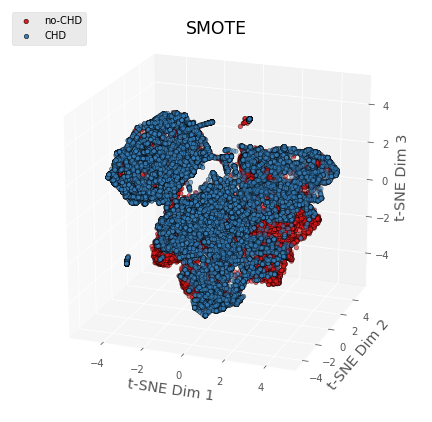

In [12]:
from mpl_toolkits.mplot3d import Axes3D

cin = sns.color_palette("Set1")[1]
edge_color = []
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_facecolor('w')
ax.scatter(X_embedded[:,0],X_embedded[:,1],X_embedded[:,2],c=[sns.color_palette("Set1")[x] for x in y_resampled],\
           edgecolors='k',label='no-CHD')
ax.scatter(0,0,0,c=cin,edgecolors='k',label='CHD')
ax.azim = -70
ax.elev = 20
ax.set_xlabel("t-SNE Dim 1", size="x-large")
ax.set_ylabel("t-SNE Dim 2", size="x-large")
ax.set_zlabel("t-SNE Dim 3", size="x-large")
plt.title("SMOTE",size="xx-large")
ax.legend(loc='upper left')
fig.set_size_inches(7.5,7.5)
fig.savefig('SMOTE_tSNE.png', dpi=100)

In [9]:
# Change shape for CNN
x_train_CNN = X_resampled.reshape(X_resampled.shape[0],X_resampled.shape[1],1)
x_test_CNN = x_test.reshape(x_test.shape[0],x_test.shape[1],1)
#%% one-hot-encoding
y_train_CNN = keras.utils.to_categorical(y_resampled,2)
y_test_CNN  = keras.utils.to_categorical(y_test,2)

In [10]:
inputs = keras.layers.Input(shape=(x_train_CNN.shape[1],1))
RS0    = keras.layers.Reshape((x_train_CNN.shape[1], ))(inputs)
FC0    = keras.layers.Dense(64, bias_initializer=keras.initializers.VarianceScaling())(RS0)
BN0    = keras.layers.BatchNormalization(axis=-1)(FC0)
AC0    = keras.layers.Activation('relu')(BN0)
DP0    = keras.layers.Dropout(0.2)(AC0)

RS1    = keras.layers.Reshape((64,1))(DP0)
FC1    = keras.layers.Conv1D(2,3,strides=1)(RS1)
BN1    = keras.layers.BatchNormalization(axis=-1)(FC1)
AC1    = keras.layers.Activation('relu')(BN1)
Pool1  = keras.layers.AveragePooling1D(pool_size=2)(AC1)

FC2    = keras.layers.Conv1D(4,5,strides=1)(Pool1)
BN2    = keras.layers.BatchNormalization(axis=-1)(FC2)
AC2    = keras.layers.Activation('relu')(BN2)
Pool2  = keras.layers.AveragePooling1D(pool_size=2)(AC2)

FL1    = keras.layers.Flatten()(Pool2)

FC3    = keras.layers.Dense(512, bias_initializer=keras.initializers.VarianceScaling())(FL1)
BN3    = keras.layers.BatchNormalization(axis=-1)(FC3)
AC3    = keras.layers.Activation('relu')(BN3)
DP3    = keras.layers.Dropout(0.2)(AC3)


FC4    = keras.layers.Dense(2)(DP3)
outputs = keras.layers.Activation('softmax')(FC4)

myCNN1D5 = keras.Model(inputs=inputs,outputs=outputs)
myCNN1D5.compile(optimizer=keras.optimizers.Adam(),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
#myCNN1D5.summary()

In [23]:
class_weight = {0: 1, 1: 1}

myCNN1D5.fit(x_train_CNN,y_train_CNN,batch_size=4,epochs=2,verbose=1,class_weight=class_weight)

Train on 64026 samples
Epoch 1/2
64026/64026 [==============================] - 107s 2ms/sample - loss: 0.4921 - accuracy: 0.7696
Epoch 2/2
64026/64026 [==============================] - 114s 2ms/sample - loss: 0.4850 - accuracy: 0.7729


In [24]:
test_loss,test_acc = myCNN1D5.evaluate(x_test_CNN,y_test_CNN)
print(test_acc)

3709/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.68428147


In [20]:
from sklearn import metrics
predlabel = myCNN1D5.predict(x_test_CNN)
f = np.argmax(predlabel,axis=1)
confMat = metrics.confusion_matrix(np.argmax(y_test_CNN,axis=1),f)
print(confMat)

[[2764  794]
 [  32  119]]


## SVM SMOTE (2009)

## ADASYN (2008)

In [13]:
from imblearn.over_sampling import ADASYN

X_resampled, y_resampled = ADASYN(random_state=1342).fit_resample(x_train, y_train)
print('Resampled dataset shape %s' % Counter(y_resampled))

Resampled dataset shape Counter({1: 32121, 0: 32013})


### t-SNE visualization

In [14]:
X_embedded = TSNE(n_components=3, n_iter = 300, verbose=1).fit_transform(X_resampled)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 64134 samples in 1.303s...
[t-SNE] Computed neighbors for 64134 samples in 591.711s...
[t-SNE] Computed conditional probabilities for sample 1000 / 64134
[t-SNE] Computed conditional probabilities for sample 2000 / 64134
[t-SNE] Computed conditional probabilities for sample 3000 / 64134
[t-SNE] Computed conditional probabilities for sample 4000 / 64134
[t-SNE] Computed conditional probabilities for sample 5000 / 64134
[t-SNE] Computed conditional probabilities for sample 6000 / 64134
[t-SNE] Computed conditional probabilities for sample 7000 / 64134
[t-SNE] Computed conditional probabilities for sample 8000 / 64134
[t-SNE] Computed conditional probabilities for sample 9000 / 64134
[t-SNE] Computed conditional probabilities for sample 10000 / 64134
[t-SNE] Computed conditional probabilities for sample 11000 / 64134
[t-SNE] Computed conditional probabilities for sample 12000 / 64134
[t-SNE] Computed conditional probabilities for s

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


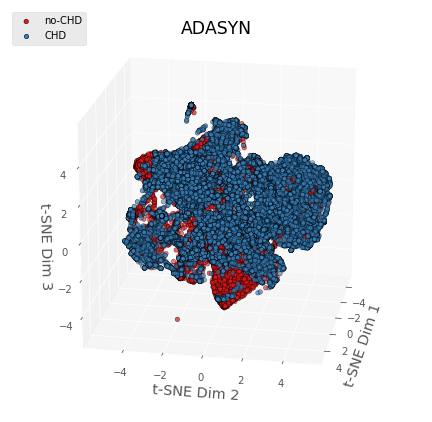

In [15]:
from mpl_toolkits.mplot3d import Axes3D

cin = sns.color_palette("Set1")[1]
edge_color = []
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_facecolor('w')
ax.scatter(X_embedded[:,0],X_embedded[:,1],X_embedded[:,2],c=[sns.color_palette("Set1")[x] for x in y_resampled],\
           edgecolors='k',label='no-CHD')
ax.scatter(0,0,0,c=cin,edgecolors='k',label='CHD')
ax.azim = 10
ax.elev = 20
ax.set_xlabel("t-SNE Dim 1", size="x-large")
ax.set_ylabel("t-SNE Dim 2", size="x-large")
ax.set_zlabel("t-SNE Dim 3", size="x-large")
plt.title("ADASYN",size="xx-large")
ax.legend(loc='upper left')
fig.set_size_inches(7.5,7.5)
fig.savefig('ADASYN_tSNE.png', dpi=100)

In [62]:
# Change shape for CNN
x_train_CNN = X_resampled.reshape(X_resampled.shape[0],X_resampled.shape[1],1)
x_test_CNN = x_test.reshape(x_test.shape[0],x_test.shape[1],1)
#%% one-hot-encoding
y_train_CNN = keras.utils.to_categorical(y_resampled,2)
y_test_CNN  = keras.utils.to_categorical(y_test,2)

In [27]:
inputs = keras.layers.Input(shape=(x_train_CNN.shape[1],1))
RS0    = keras.layers.Reshape((x_train_CNN.shape[1], ))(inputs)
FC0    = keras.layers.Dense(64, bias_initializer=keras.initializers.VarianceScaling())(RS0)
BN0    = keras.layers.BatchNormalization(axis=-1)(FC0)
AC0    = keras.layers.Activation('relu')(BN0)
DP0    = keras.layers.Dropout(0.2)(AC0)

RS1    = keras.layers.Reshape((64,1))(DP0)
FC1    = keras.layers.Conv1D(2,3,strides=1)(RS1)
BN1    = keras.layers.BatchNormalization(axis=-1)(FC1)
AC1    = keras.layers.Activation('relu')(BN1)
Pool1  = keras.layers.AveragePooling1D(pool_size=2)(AC1)

FC2    = keras.layers.Conv1D(4,5,strides=1)(Pool1)
BN2    = keras.layers.BatchNormalization(axis=-1)(FC2)
AC2    = keras.layers.Activation('relu')(BN2)
Pool2  = keras.layers.AveragePooling1D(pool_size=2)(AC2)

FL1    = keras.layers.Flatten()(Pool2)

FC3    = keras.layers.Dense(512, bias_initializer=keras.initializers.VarianceScaling())(FL1)
BN3    = keras.layers.BatchNormalization(axis=-1)(FC3)
AC3    = keras.layers.Activation('relu')(BN3)
DP3    = keras.layers.Dropout(0.2)(AC3)


FC4    = keras.layers.Dense(2)(DP3)
outputs = keras.layers.Activation('softmax')(FC4)

myCNN1D6 = keras.Model(inputs=inputs,outputs=outputs)
myCNN1D6.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0004),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
#myCNN1D5.summary()

In [60]:
class_weight = {0: 1, 1: 1}

myCNN1D6.fit(x_train_CNN,y_train_CNN,batch_size=6,epochs=1,verbose=1,class_weight=class_weight)

Train on 64134 samples
64134/64134 [==============================] - 119s 2ms/sample - loss: 0.4174 - accuracy: 0.8112


In [62]:
test_loss,test_acc = myCNN1D6.evaluate(x_test_CNN,y_test_CNN)
print(test_acc)

3709/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.7853869


In [63]:
from sklearn import metrics
predlabel = myCNN1D6.predict(x_test_CNN)
f = np.argmax(predlabel,axis=1)
confMat = metrics.confusion_matrix(np.argmax(y_test_CNN,axis=1),f)
print(confMat)

[[2798  760]
 [  36  115]]


# Undersampling strategies 

## Edited nearest neighbor (1972)

In [16]:
from imblearn.under_sampling import EditedNearestNeighbours

cc = EditedNearestNeighbours()
X_resampled, y_resampled = cc.fit_resample(x_train, y_train)

In [17]:
print(sorted(Counter(y_resampled).items()))

[(0, 29347), (1, 1357)]


In [18]:
print(y_resampled.shape)

(30704,)


In [66]:
X_resampled_copy = copy.deepcopy(X_resampled)
X_remnant, y_remnant = findRemnant(x_train,X_resampled_copy,y_train)

In [67]:
x_test_remnant = np.r_[X_remnant,x_test]
y_test_remnant = np.r_[y_remnant,y_test]

### t-SNE visualization

In [19]:
from sklearn.manifold import TSNE
import seaborn as sns

In [20]:
X_embedded = TSNE(n_components=3, n_iter = 500, verbose=1).fit_transform(X_resampled)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 30704 samples in 0.501s...
[t-SNE] Computed neighbors for 30704 samples in 127.832s...
[t-SNE] Computed conditional probabilities for sample 1000 / 30704
[t-SNE] Computed conditional probabilities for sample 2000 / 30704
[t-SNE] Computed conditional probabilities for sample 3000 / 30704
[t-SNE] Computed conditional probabilities for sample 4000 / 30704
[t-SNE] Computed conditional probabilities for sample 5000 / 30704
[t-SNE] Computed conditional probabilities for sample 6000 / 30704
[t-SNE] Computed conditional probabilities for sample 7000 / 30704
[t-SNE] Computed conditional probabilities for sample 8000 / 30704
[t-SNE] Computed conditional probabilities for sample 9000 / 30704
[t-SNE] Computed conditional probabilities for sample 10000 / 30704
[t-SNE] Computed conditional probabilities for sample 11000 / 30704
[t-SNE] Computed conditional probabilities for sample 12000 / 30704
[t-SNE] Computed conditional probabilities for s

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


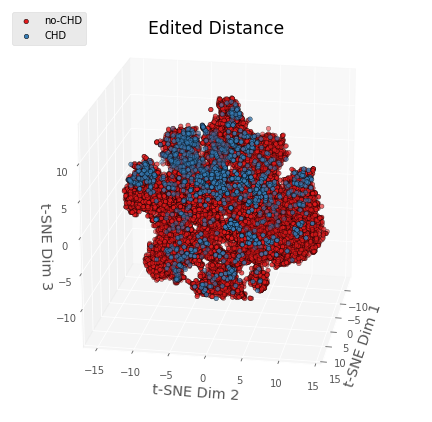

In [21]:
from mpl_toolkits.mplot3d import Axes3D

cin = sns.color_palette("Set1")[1]
edge_color = []
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_facecolor('w')
ax.scatter(X_embedded[:,0],X_embedded[:,1],X_embedded[:,2],c=[sns.color_palette("Set1")[x] for x in y_resampled],\
           edgecolors='k',label='no-CHD')
ax.scatter(0,0,0,c=cin,edgecolors='k',label='CHD')
ax.azim = 10
ax.elev = 20
ax.set_xlabel("t-SNE Dim 1", size="x-large")
ax.set_ylabel("t-SNE Dim 2", size="x-large")
ax.set_zlabel("t-SNE Dim 3", size="x-large")
plt.title("Edited Distance",size="xx-large")
ax.legend(loc='upper left')
fig.set_size_inches(7.5,7.5)
fig.savefig('EDN_tSNE.png', dpi=100)

In [68]:
# Change shape for CNN
x_train_CNN = X_resampled.reshape(X_resampled.shape[0],X_resampled.shape[1],1)
x_test_CNN = x_test.reshape(x_test.shape[0],x_test.shape[1],1)
x_test_remnant = x_test_remnant.reshape(x_test_remnant.shape[0],x_test_remnant.shape[1],1) 
#%% one-hot-encoding
y_train_CNN = keras.utils.to_categorical(y_resampled,2)
y_test_CNN  = keras.utils.to_categorical(y_test,2)
y_test_remnant  = keras.utils.to_categorical(y_test_remnant,2)

In [69]:
inputs = keras.layers.Input(shape=(x_train_CNN.shape[1],1))
RS0    = keras.layers.Reshape((x_train_CNN.shape[1], ))(inputs)
FC0    = keras.layers.Dense(64, bias_initializer=keras.initializers.VarianceScaling())(RS0)
BN0    = keras.layers.BatchNormalization(axis=-1)(FC0)
AC0    = keras.layers.Activation('relu')(BN0)
DP0    = keras.layers.Dropout(0.2)(AC0)

RS1    = keras.layers.Reshape((64,1))(DP0)
FC1    = keras.layers.Conv1D(2,3,strides=1)(RS1)
BN1    = keras.layers.BatchNormalization(axis=-1)(FC1)
AC1    = keras.layers.Activation('relu')(BN1)
Pool1  = keras.layers.AveragePooling1D(pool_size=2)(AC1)

FC2    = keras.layers.Conv1D(4,5,strides=1)(Pool1)
BN2    = keras.layers.BatchNormalization(axis=-1)(FC2)
AC2    = keras.layers.Activation('relu')(BN2)
Pool2  = keras.layers.AveragePooling1D(pool_size=2)(AC2)

FL1    = keras.layers.Flatten()(Pool2)

FC3    = keras.layers.Dense(512, bias_initializer=keras.initializers.VarianceScaling())(FL1)
BN3    = keras.layers.BatchNormalization(axis=-1)(FC3)
AC3    = keras.layers.Activation('relu')(BN3)
DP3    = keras.layers.Dropout(0.2)(AC3)


FC4    = keras.layers.Dense(2)(DP3)
outputs = keras.layers.Activation('softmax')(FC4)

myCNN1Dcc = keras.Model(inputs=inputs,outputs=outputs)
myCNN1Dcc.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0004),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

In [88]:
class_weight = {0: 1, 1: 22}

myCNN1Dcc.fit(x_train_CNN,y_train_CNN,batch_size=10,epochs=1,verbose=1,class_weight=class_weight)

Train on 30704 samples
30704/30704 [==============================] - 32s 1ms/sample - loss: 0.8623 - accuracy: 0.7592


In [89]:
test_loss,test_acc = myCNN1Dcc.evaluate(x_test_remnant,y_test_remnant)
print(test_acc)
from sklearn import metrics
predlabel = myCNN1Dcc.predict(x_test_remnant)
f = np.argmax(predlabel,axis=1)
confMat = metrics.confusion_matrix(np.argmax(y_test_remnant,axis=1),f)
print(confMat)

6376/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.560069
[[3443 2781]
 [  24  128]]


## Near-Miss (2003)

In [30]:
from imblearn.under_sampling import NearMiss

nm1 = NearMiss(sampling_strategy=0.3, version=3)
X_resampled_nm1, y_resampled = nm1.fit_resample(x_train, y_train)


C:\Users\TamalVIVA\Anaconda3\lib\site-packages\imblearn\under_sampling\_prototype_selection\_nearmiss.py:175: UserWarning: The number of the samples to be selected is larger than the number of samples available. The balancing ratio cannot be ensure and all samples will be returned.
  "The number of the samples to be selected is larger"


In [31]:
print(sorted(Counter(y_resampled).items()))

[(0, 3166), (1, 1357)]


### t-SNE visualization

In [32]:
from sklearn.manifold import TSNE
import seaborn as sns

X_embedded = TSNE(n_components=3, n_iter = 500, verbose=1).fit_transform(X_resampled_nm1)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 4523 samples in 0.060s...
[t-SNE] Computed neighbors for 4523 samples in 2.110s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4523
[t-SNE] Computed conditional probabilities for sample 2000 / 4523
[t-SNE] Computed conditional probabilities for sample 3000 / 4523
[t-SNE] Computed conditional probabilities for sample 4000 / 4523
[t-SNE] Computed conditional probabilities for sample 4523 / 4523
[t-SNE] Mean sigma: 1.862836
[t-SNE] KL divergence after 250 iterations with early exaggeration: 75.005859
[t-SNE] KL divergence after 500 iterations: 1.298716


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


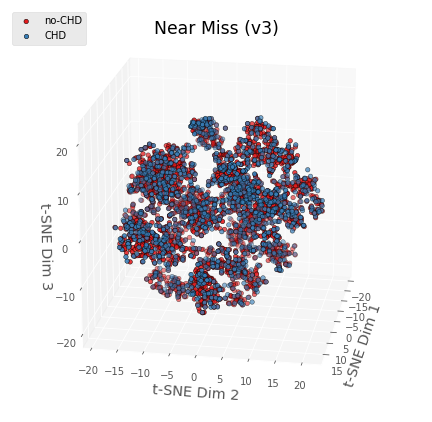

In [33]:
from mpl_toolkits.mplot3d import Axes3D

cin = sns.color_palette("Set1")[1]
edge_color = []
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_facecolor('w')
ax.scatter(X_embedded[:,0],X_embedded[:,1],X_embedded[:,2],c=[sns.color_palette("Set1")[x] for x in y_resampled],\
           edgecolors='k',label='no-CHD')
ax.scatter(0,0,0,c=cin,edgecolors='k',label='CHD')
ax.azim = 10
ax.elev = 20
ax.set_xlabel("t-SNE Dim 1", size="x-large")
ax.set_ylabel("t-SNE Dim 2", size="x-large")
ax.set_zlabel("t-SNE Dim 3", size="x-large")
plt.title("Near Miss (v3)",size="xx-large")
ax.legend(loc='upper left')
fig.set_size_inches(7.5,7.5)
fig.savefig('NM3_tSNE.png', dpi=100)

In [156]:
X_resampled_copy = copy.deepcopy(X_resampled_nm1)
X_remnant, y_remnant = findRemnant(x_train,X_resampled_copy,y_train)

In [157]:
print(X_remnant.shape)

(27491, 45)


In [158]:
x_test_remnant = np.r_[X_remnant,x_test]
y_test_remnant = np.r_[y_remnant,y_test]

In [159]:
# Change shape for CNN
x_train_CNN = X_resampled_nm1.reshape(X_resampled_nm1.shape[0],X_resampled_nm1.shape[1],1)
x_test_CNN = x_test.reshape(x_test.shape[0],x_test.shape[1],1)
x_test_remnant = x_test_remnant.reshape(x_test_remnant.shape[0],x_test_remnant.shape[1],1)
#%% one-hot-encoding
y_train_CNN = keras.utils.to_categorical(y_resampled,2)
y_test_CNN  = keras.utils.to_categorical(y_test,2)
y_test_remnant  = keras.utils.to_categorical(y_test_remnant,2)

In [160]:
inputs = keras.layers.Input(shape=(x_train_CNN.shape[1],1))
RS0    = keras.layers.Reshape((x_train_CNN.shape[1], ))(inputs)
FC0    = keras.layers.Dense(64, bias_initializer=keras.initializers.VarianceScaling())(RS0)
BN0    = keras.layers.BatchNormalization(axis=-1)(FC0)
AC0    = keras.layers.Activation('relu')(BN0)
DP0    = keras.layers.Dropout(0.2)(AC0)

RS1    = keras.layers.Reshape((64,1))(DP0)
FC1    = keras.layers.Conv1D(2,3,strides=1)(RS1)
BN1    = keras.layers.BatchNormalization(axis=-1)(FC1)
AC1    = keras.layers.Activation('relu')(BN1)
Pool1  = keras.layers.AveragePooling1D(pool_size=2)(AC1)

FC2    = keras.layers.Conv1D(4,5,strides=1)(Pool1)
BN2    = keras.layers.BatchNormalization(axis=-1)(FC2)
AC2    = keras.layers.Activation('relu')(BN2)
Pool2  = keras.layers.AveragePooling1D(pool_size=2)(AC2)

FL1    = keras.layers.Flatten()(Pool2)

FC3    = keras.layers.Dense(512, bias_initializer=keras.initializers.VarianceScaling())(FL1)
BN3    = keras.layers.BatchNormalization(axis=-1)(FC3)
AC3    = keras.layers.Activation('relu')(BN3)
DP3    = keras.layers.Dropout(0.2)(AC3)


FC4    = keras.layers.Dense(2)(DP3)
outputs = keras.layers.Activation('softmax')(FC4)

myCNN1Dnm1 = keras.Model(inputs=inputs,outputs=outputs)
myCNN1Dnm1.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0004),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

In [189]:
class_weight = {0: 1, 1: 4}

myCNN1Dnm1.fit(x_train_CNN,y_train_CNN,batch_size=50,epochs=1,verbose=1,class_weight=class_weight)

Train on 5880 samples
5880/5880 [==============================] - 2s 312us/sample - loss: 0.6086 - accuracy: 0.8211


In [190]:
from sklearn import metrics
predlabel = myCNN1Dnm1.predict(x_test_remnant)
f = np.argmax(predlabel,axis=1)
confMat = metrics.confusion_matrix(np.argmax(y_test_remnant,axis=1),f)
print(confMat)

[[17797 13251]
 [   22   130]]


In [30]:
test_loss,test_acc = myCNN1Dnm1.evaluate(x_test_remnant,y_test_remnant)
print(test_acc)

31200/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.62596154


## Instance Hardness Threshold (2014)

In [34]:
from imblearn.under_sampling import InstanceHardnessThreshold


iht = InstanceHardnessThreshold(sampling_strategy=0.2, random_state=102)
X_resampled_iht, y_resampled_iht = iht.fit_resample(x_train, y_train)

In [35]:
print(sorted(Counter(y_resampled_iht).items()))
y_resampled_iht[1]

[(0, 10728), (1, 1357)]


0

In [193]:
X_resampled_copy = copy.deepcopy(X_resampled_iht)
X_remnant, y_remnant = findRemnant(x_train,X_resampled_copy,y_train)

In [194]:
print(y_resampled_iht.shape)

(12085,)


### t-SNE visualization

In [36]:
from sklearn.manifold import TSNE
import seaborn as sns

X_embedded = TSNE(n_components=3, n_iter = 500, verbose=1).fit_transform(X_resampled_iht)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 12085 samples in 0.163s...
[t-SNE] Computed neighbors for 12085 samples in 18.210s...
[t-SNE] Computed conditional probabilities for sample 1000 / 12085
[t-SNE] Computed conditional probabilities for sample 2000 / 12085
[t-SNE] Computed conditional probabilities for sample 3000 / 12085
[t-SNE] Computed conditional probabilities for sample 4000 / 12085
[t-SNE] Computed conditional probabilities for sample 5000 / 12085
[t-SNE] Computed conditional probabilities for sample 6000 / 12085
[t-SNE] Computed conditional probabilities for sample 7000 / 12085
[t-SNE] Computed conditional probabilities for sample 8000 / 12085
[t-SNE] Computed conditional probabilities for sample 9000 / 12085
[t-SNE] Computed conditional probabilities for sample 10000 / 12085
[t-SNE] Computed conditional probabilities for sample 11000 / 12085
[t-SNE] Computed conditional probabilities for sample 12000 / 12085
[t-SNE] Computed conditional probabilities for sa

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

cin = sns.color_palette("Set1")[1]
edge_color = []
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_facecolor('w')
ax.scatter(X_embedded[:,0],X_embedded[:,1],X_embedded[:,2],c=[sns.color_palette("Set1")[x] for x in y_resampled_iht],\
           edgecolors='k',label='no-CHD')
ax.scatter(0,0,0,c=cin,edgecolors='k',label='CHD')
ax.azim = 10
ax.elev = 20
ax.set_xlabel("t-SNE Dim 1", size="x-large")
ax.set_ylabel("t-SNE Dim 2", size="x-large")
ax.set_zlabel("t-SNE Dim 3", size="x-large")
plt.title("Instance Hardness Threshold",size="xx-large")
ax.legend(loc='upper left')
fig.set_size_inches(7.5,7.5)
fig.savefig('IHT_tSNE.png', dpi=100)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


In [195]:
x_test_remnant = np.r_[X_remnant,x_test]
y_test_remnant = np.r_[y_remnant,y_test]

In [196]:
print(x_test_remnant.shape)

(24995, 45)


In [197]:
# Change shape for CNN

x_train_CNN = X_resampled_iht.reshape(X_resampled_iht.shape[0],X_resampled_iht.shape[1],1)
x_test_CNN = x_test.reshape(x_test.shape[0],x_test.shape[1],1)
x_test_remnant = x_test_remnant.reshape(x_test_remnant.shape[0],x_test_remnant.shape[1],1) 
#%% one-hot-encoding
y_train_CNN = keras.utils.to_categorical(y_resampled_iht,2)
y_test_CNN  = keras.utils.to_categorical(y_test,2)
y_test_remnant  = keras.utils.to_categorical(y_test_remnant,2)



In [198]:
inputs = keras.layers.Input(shape=(x_train_CNN.shape[1],1))
RS0    = keras.layers.Reshape((x_train_CNN.shape[1], ))(inputs)
FC0    = keras.layers.Dense(64, bias_initializer=keras.initializers.VarianceScaling())(RS0)
BN0    = keras.layers.BatchNormalization(axis=-1)(FC0)
AC0    = keras.layers.Activation('relu')(BN0)
DP0    = keras.layers.Dropout(0.2)(AC0)

RS1    = keras.layers.Reshape((64,1))(DP0)
FC1    = keras.layers.Conv1D(2,3,strides=1)(RS1)
BN1    = keras.layers.BatchNormalization(axis=-1)(FC1)
AC1    = keras.layers.Activation('relu')(BN1)
Pool1  = keras.layers.AveragePooling1D(pool_size=2)(AC1)

FC2    = keras.layers.Conv1D(4,5,strides=1)(Pool1)
BN2    = keras.layers.BatchNormalization(axis=-1)(FC2)
AC2    = keras.layers.Activation('relu')(BN2)
Pool2  = keras.layers.AveragePooling1D(pool_size=2)(AC2)

FL1    = keras.layers.Flatten()(Pool2)

FC3    = keras.layers.Dense(512, bias_initializer=keras.initializers.VarianceScaling())(FL1)
BN3    = keras.layers.BatchNormalization(axis=-1)(FC3)
AC3    = keras.layers.Activation('relu')(BN3)
DP3    = keras.layers.Dropout(0.2)(AC3)


FC4    = keras.layers.Dense(2)(DP3)
outputs = keras.layers.Activation('softmax')(FC4)

myCNN1Diht = keras.Model(inputs=inputs,outputs=outputs)
myCNN1Diht.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0002),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

#myCNN1Diht.summary()

In [237]:
class_weight = {0: 1, 1: 2}

myCNN1Diht.fit(x_train_CNN,y_train_CNN,epochs=1,verbose=1,class_weight=class_weight)

Train on 12085 samples
12085/12085 [==============================] - 6s 461us/sample - loss: 0.1419 - accuracy: 0.9640


In [238]:
#test_loss,test_acc = myCNN1Diht.evaluate(x_test_remnant,y_test_remnant)
#print(test_acc)

from sklearn import metrics
predlabel = myCNN1Diht.predict(x_test_remnant)
f = np.argmax(predlabel,axis=1)
confMat = metrics.confusion_matrix(np.argmax(y_test_remnant,axis=1),f)
print(confMat)

[[14109 10734]
 [   15   137]]
